In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

$${\boldsymbol p}_{l,k} = {\mathbf \Phi}^H {\mathbf V}({\omega_l}){\mathbf D}_M({\Delta}{\boldsymbol \varphi}_k) {\boldsymbol x}_k
+ {\mathbf N}_l ,\forall l \in \{1,\dots,L\}$$

${\boldsymbol x}_k \in {\mathbb R}^{M\times 1}$  ${\boldsymbol x}_{k,m} \in \{ 0,1\}$


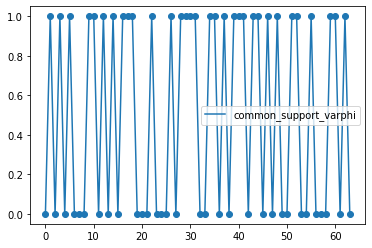

In [63]:
## generate channel support
K=4
# 6 is a nice value
np.random.seed(2)
def common_channel_support(p01 = 0.1, p10=0.3, M= 64):
    p0 = p10/(p10+p01)
    p1 = 1-p0

    # generate Markov chain
    tmp_support = np.array([0.0 for m in range(M)])
    if np.random.uniform(0,1,1)[0] < p0:
        tmp_support[0] = 0
    for i in range(M - 1):
        if tmp_support[i] == 0:
            if np.random.uniform(0,1,2)[0] < p01:
                tmp_support[i+1] = 1
            else:
                tmp_support[i+1] = 0
        else:
            if np.random.uniform(0,1,2)[1] < p10:
                tmp_support[i+1] = 0
            else:
                tmp_support[i+1] = 1
    return tmp_support
p01 = 0.5
p10 = 0.5
M = 64
common_support_varphi = common_channel_support(p01, p10, M)
plt.scatter(range(M), common_support_varphi)
plt.plot(range(M), common_support_varphi)
plt.legend(['common_support_varphi'])


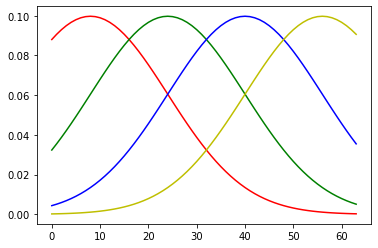

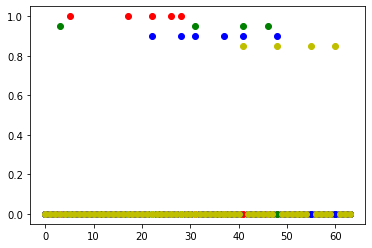

In [62]:
np.random.seed(3)
color_list = ['r', 'g', 'b', 'y']
sigma = 4
less_likely_to_appear = 3


# generate individual AoAs support
def pdf_for_all_user(user_index, K = 4, M = 64, sigma = 6):
    x = np.linspace(0,M-1,M)
    mu = int(user_index*(M/K)+0.5*M/K)
    return 1/(np.power(2*np.pi*np.power(sigma,2), 0.5)) * np.exp(-0.5 * np.power((x-mu)/np.power(sigma,2),2))

conditinal_pdf_list = [pdf_for_all_user(k,K,M,sigma=sigma) for k in range(K)]
for k in range(K):
    plt.plot(range(M), conditinal_pdf_list[k], color_list[k])

# initialization for all users' channel support
channel_support_for_all_users = np.array([[0 for m in range(M)] for k in range(K)] )

for k in range(K):
    for m in range(M):
        if common_support_varphi[m] == 1:
            maxi = np.max(conditinal_pdf_list[k])*less_likely_to_appear
            if np.random.uniform(0,maxi,K*M)[m+k*m] < conditinal_pdf_list[k][m]:
                channel_support_for_all_users[k][m] = 1
            else:
                channel_support_for_all_users[k][m] = 0

plt.figure(2)
for k in range(K):
    plt.scatter(np.array(range(M)), channel_support_for_all_users[k] * (1-0.05*k), color=color_list[k])
    # plt.plot(np.array(range(M)), channel_support_for_all_users[k] * (k+1)/K, color=color_list[k])



$\varphi_{k,j} = \frac{d}{\lambda}\operatorname{cos}(\varphi_{\theta}) \in [-0.5, 0.5)$

$$
\mathbf{a}_{X}(x)=\left[1, e^{-\mathrm{i} 2 \pi x}, \ldots, e^{-\mathrm{i} 2 \pi(X-1) x}\right]^{\mathrm{T}}
$$

$\Delta \varphi_{k,j}=\varphi_{k,j} -\varphi_{k,j}^g \in [0,\frac{1}{M})$

In [64]:
np.random.seed(3)
Delta_varphi_min = 0
Delta_varphi_max = 1/M
Delta_varphi = np.random.uniform(Delta_varphi_min, Delta_varphi_max, M)



${\mathbf D}_M(\Delta {\boldsymbol \varphi})= [D_M(\Delta \varphi_1),\dots,D_M(\Delta \varphi_M)] \in {\mathbb C}^{M\times M}$

$$
D_M(\Delta {\varphi_1})_{m^{\prime}}=\begin{cases}
\begin{aligned}
f_M({2\pi}(\frac{m^{\prime}-m} {M}+\Delta\varphi))\ &, \frac{m^{\prime}-1}{M} < 0.5 \\
f_M({2\pi}(\frac{m^{\prime}-m+M} {M}+\Delta\varphi)) &, \frac{m^{\prime}-1}{M} \geq 0.5
\end{aligned}

\end{cases}
$$

In [ ]:
## generate D_M
